# **Ramco_Systems_AI_Intern_assignment CSE 21-25 III Year 6 Sem**

**Embeddings using CSV (d1.csv)**

In [8]:
import pandas as pd
df = pd.read_csv('d1.csv', sep='\t', header=None)
print(df.head(100))


                                            0
0            66,TeamEngland,isHomeTeam,Match6
1           67,TeamScotland,isAwayTeam,Match6
2               68,TeamEngland,loserOf,Match6
3             69,TeamScotland,winnerOf,Match6
4   70,Match6,inTournament,TournamentFriendly
..                                        ...
95                161,Match14,isNeutral,FALSE
96                    162,Match14,atYear,1880
97                   163,Match14,homeScores,2
98                   164,Match14,awayScores,3
99        165,TeamScotland,isHomeTeam,Match15

[100 rows x 1 columns]


In [9]:
import pandas as pd
df = pd.read_csv('d1.csv', header=None)
team_data = df[df[1].str.startswith('Team')]
print(team_data)


           0             1           2          3
0         66   TeamEngland  isHomeTeam     Match6
1         67  TeamScotland  isAwayTeam     Match6
2         68   TeamEngland     loserOf     Match6
3         69  TeamScotland    winnerOf     Match6
11        77     TeamWales  isHomeTeam     Match7
...      ...           ...         ...        ...
76981  77047  TeamCameroon     loserOf  Match7004
76989  77055     TeamLibya  isHomeTeam  Match7006
76990  77056  TeamEthiopia  isAwayTeam  Match7006
76991  77057     TeamLibya    winnerOf  Match7006
76992  77058  TeamEthiopia     loserOf  Match7006

[28000 rows x 4 columns]


In [10]:
import pandas as pd
df = pd.read_csv('d1.csv', header=None)
team_data = df[df[1].str.startswith('Team')]

team_wins = {}
team_losses = {}
team_draws = {}

for index, row in team_data.iterrows():
    team = row[1]
    action = row[2]
    match_identifier = row[3]

    if action == 'winnerOf':
        if team in team_wins:
            team_wins[team] += 1
        else:
            team_wins[team] = 1
    elif action == 'loserOf':
        if team in team_losses:
            team_losses[team] += 1
        else:
            team_losses[team] = 1
    elif action == 'draw':
        if team in team_draws:
            team_draws[team] += 1
        else:
            team_draws[team] = 1

for team in team_wins.keys():
    wins = team_wins.get(team, 0)
    losses = team_losses.get(team, 0)
    draws = team_draws.get(team, 0)
    print(f"Team {team} has won {wins} matches, lost {losses} matches, and had {draws} draws.")


Team TeamScotland has won 183 matches, lost 82 matches, and had 0 draws.
Team TeamEngland has won 251 matches, lost 87 matches, and had 0 draws.
Team TeamWales has won 73 matches, lost 148 matches, and had 0 draws.
Team TeamCanada has won 9 matches, lost 11 matches, and had 0 draws.
Team TeamUnitedStates has won 18 matches, lost 37 matches, and had 0 draws.
Team TeamNorthernIreland has won 53 matches, lost 162 matches, and had 0 draws.
Team TeamArgentina has won 223 matches, lost 91 matches, and had 0 draws.
Team TeamAustria has won 153 matches, lost 128 matches, and had 0 draws.
Team TeamHungary has won 234 matches, lost 106 matches, and had 0 draws.
Team TeamUruguay has won 157 matches, lost 126 matches, and had 0 draws.
Team TeamFrance has won 108 matches, lost 146 matches, and had 0 draws.
Team TeamNetherlands has won 112 matches, lost 109 matches, and had 0 draws.
Team TeamBelgium has won 113 matches, lost 149 matches, and had 0 draws.
Team TeamCzechoslovakia has won 128 matches, 

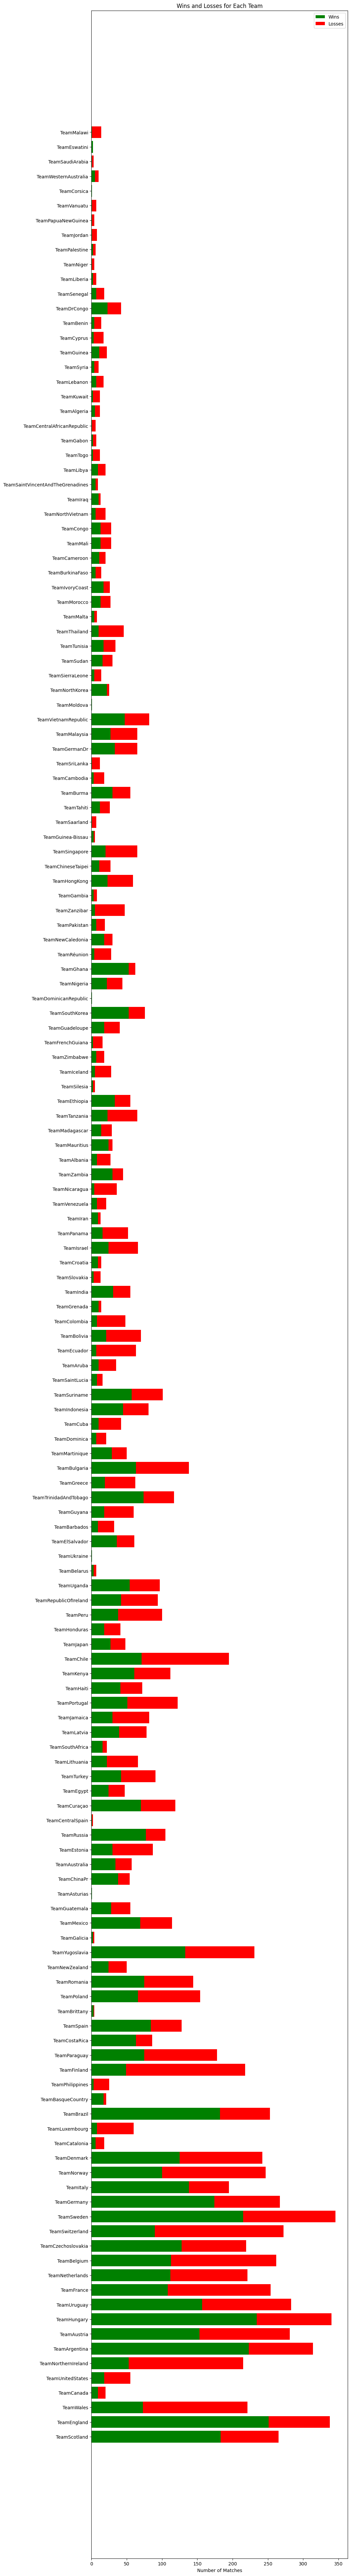

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('d1.csv', header=None)

team_data = df[df[1].str.startswith('Team')]

team_wins = {}
team_losses = {}

for index, row in team_data.iterrows():
    team = row[1]
    action = row[2]
    match_identifier = row[3]

    if action == 'winnerOf':
        team_wins[team] = team_wins.get(team, 0) + 1
    elif action == 'loserOf':
        team_losses[team] = team_losses.get(team, 0) + 1

teams = list(team_wins.keys())
wins = [team_wins.get(team, 0) for team in teams]
losses = [team_losses.get(team, 0) for team in teams]

plt.figure(figsize=(10, 100))
plt.barh(teams, wins, color='green', label='Wins')
plt.barh(teams, losses, left=wins, color='red', label='Losses')
plt.xlabel('Number of Matches')
plt.title('Wins and Losses for Each Team')
plt.legend()
plt.show()


In [12]:
import pandas as pd

df = pd.read_csv('d1.csv', header=None)
team_data = df[df[1].str.startswith('Team')]

team_wins = {}
team_losses = {}

for index, row in team_data.iterrows():
    team = row[1]
    action = row[2]

    if action == 'winnerOf':
        team_wins[team] = team_wins.get(team, 0) + 1
    elif action == 'loserOf':
        team_losses[team] = team_losses.get(team, 0) + 1

results_data = []
for team in team_wins.keys():
    total_matches = team_wins.get(team, 0) + team_losses.get(team, 0)
    wins = team_wins.get(team, 0)
    losses = team_losses.get(team, 0)
    results_data.append([team, total_matches, wins, losses])

results_df = pd.DataFrame(results_data, columns=['Team', 'Total Matches', 'Wins', 'Losses'])
print(results_df)


                     Team  Total Matches  Wins  Losses
0            TeamScotland            265   183      82
1             TeamEngland            338   251      87
2               TeamWales            221    73     148
3              TeamCanada             20     9      11
4        TeamUnitedStates             55    18      37
..                    ...            ...   ...     ...
153           TeamCorsica              1     1       0
154  TeamWesternAustralia             10     5       5
155       TeamSaudiArabia              3     1       2
156          TeamEswatini              2     2       0
157            TeamMalawi             14     1      13

[158 rows x 4 columns]


In [13]:
import pandas as pd

df = pd.read_csv('d1.csv', header=None)
team_data = df[df[1].str.startswith('Team')]
team_wins = {}
team_losses = {}

for index, row in team_data.iterrows():
    team = row[1]
    action = row[2]

    if action == 'winnerOf':
        team_wins[team] = team_wins.get(team, 0) + 1
    elif action == 'loserOf':
        team_losses[team] = team_losses.get(team, 0) + 1

results_data = []
for team in team_wins.keys():
    total_matches = team_wins.get(team, 0) + team_losses.get(team, 0)
    wins = team_wins.get(team, 0)
    losses = team_losses.get(team, 0)
    results_data.append([team, total_matches, wins, losses])

results_df = pd.DataFrame(results_data, columns=['Team', 'Total Matches', 'Wins', 'Losses'])

results_df.to_excel('team_results.xlsx', index=False)

print("Results have been saved to team_results.xlsx. You can download it using the link below:")
print('<a href="team_results.xlsx" download>Download Team Results</a>')


Results have been saved to team_results.xlsx. You can download it using the link below:
<a href="team_results.xlsx" download>Download Team Results</a>


In [14]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df = pd.read_csv('d1.csv', header=None)
team_data = df[df[1].str.startswith('Team')]
print(team_data)


           0                                 1           2          3
0         66                       TeamEngland  isHomeTeam     Match6
1         67                      TeamScotland  isAwayTeam     Match6
2         68                       TeamEngland     loserOf     Match6
3         69                      TeamScotland    winnerOf     Match6
11        77                         TeamWales  isHomeTeam     Match7
12        78                      TeamScotland  isAwayTeam     Match7
13        79                         TeamWales     loserOf     Match7
14        80                      TeamScotland    winnerOf     Match7
22        88                      TeamScotland  isHomeTeam     Match8
23        89                       TeamEngland  isAwayTeam     Match8
24        90                      TeamScotland    winnerOf     Match8
25        91                       TeamEngland     loserOf     Match8
33        99                      TeamScotland  isHomeTeam     Match9
34       100        

In [ ]:
!pip install gensim pandas nltk

In [15]:
from gensim.models import Word2Vec
import pandas as pd

data = pd.read_csv('d1.csv')
sentences = data.apply(lambda row: [str(cell) for cell in row], axis=1).tolist()

model = Word2Vec(sentences, vector_size=50, window=5, min_count=1, workers=4)
model.save("embeddings.model")

In [16]:
import pandas as pd
import numpy as np

model = Word2Vec.load("embeddings.model")
data = pd.read_csv('d1.csv')

embeddings = []
for index, row in data.iterrows():
    entity_embedding = np.mean([model.wv[str(cell)] for cell in row], axis=0)
    embeddings.append(entity_embedding)

np.save("embeddings.npy", embeddings)

In [19]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec

data = pd.read_csv('d1.csv')
sentences = data.apply(lambda row: [str(cell) for cell in row], axis=1).tolist()
model = Word2Vec(sentences, vector_size=50, window=5, min_count=1, workers=4)
model.save("match_embeddings.model")

model = Word2Vec.load("match_embeddings.model")
data = pd.read_csv('d1.csv')

embeddings = []
for index, row in data.iterrows():
    entity_embedding = np.mean([model.wv[str(cell)] for cell in row], axis=0)
    embeddings.append(entity_embedding)

embedding_df = pd.DataFrame(embeddings, columns=[f'embedding_dim_{i}' for i in range(embeddings[0].shape[0])])
embedding_df.to_csv("match_embeddings.csv", index=False)

combined_data = pd.concat([data, embedding_df], axis=1)
combined_data.to_csv("combined_data.csv", index=False)

In [20]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec

class FootballEmbeddings:
    def __init__(self, data_file):
        self.data_file = data_file
        self.data = None
        self.model = None
        self.embeddings = None

    def read_data(self):
        self.data = pd.read_csv(self.data_file, header=None)

    def preprocess_data(self):
        pass

    def train_embeddings(self, vector_size=50, window=5, min_count=1, workers=4):
        sentences = self.data.apply(lambda row: [str(cell) for cell in row], axis=1).tolist()
        self.model = Word2Vec(sentences, vector_size=vector_size, window=window, min_count=min_count, workers=workers)

    def embed_data(self):
        self.embeddings = []
        for index, row in self.data.iterrows():
            entity_embedding = np.mean([self.model.wv[str(cell)] for cell in row], axis=0)
            self.embeddings.append(entity_embedding)

    def store_embeddings_to_csv(self, output_file):
        embeddings_df = pd.DataFrame(self.embeddings)
        embeddings_df.to_csv(output_file, index=False, header=False)

    def retrieve_embeddings_from_csv(self, input_file):
        self.embeddings = pd.read_csv(input_file, header=None).values

    def store_retrieved_embeddings_to_csv(self, output_file):
        retrieved_embeddings_df = pd.DataFrame(self.embeddings)
        retrieved_embeddings_df.to_csv(output_file, index=False, header=False)

    def classify_entities(self):
        pass

if __name__ == "__main__":
    embeddings = FootballEmbeddings('d1.csv')
    embeddings.read_data()
    embeddings.preprocess_data()
    embeddings.train_embeddings()

    embeddings.embed_data()
    embeddings.store_embeddings_to_csv('match_embeddings.csv')
    embeddings.retrieve_embeddings_from_csv('match_embeddings.csv')
    embeddings.classify_entities()
    embeddings.store_retrieved_embeddings_to_csv('match_embeddings.csv')


In [21]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec

class FootballEmbeddings:
    def __init__(self, data_file):
        self.data_file = data_file
        self.data = None
        self.model = None
        self.embeddings = None

    def read_data(self):
        self.data = pd.read_csv(self.data_file, header=None)

    def preprocess_data(self):
        pass

    def train_embeddings(self, vector_size=50, window=5, min_count=1, workers=4):
        sentences = self.data.apply(lambda row: [str(cell) for cell in row], axis=1).tolist()
        self.model = Word2Vec(sentences, vector_size=vector_size, window=window, min_count=min_count, workers=workers)

    def embed_data(self):
        self.embeddings = []
        for i in range(0, len(self.data), 11):
            match_data = self.data.iloc[i:i+11, :]
            match_embedding = np.mean([self.model.wv[str(cell)] for _, row in match_data.iterrows() for cell in row], axis=0)
            self.embeddings.append(match_embedding)

    def store_embeddings_to_csv(self, output_file):
        embeddings_df = pd.DataFrame(self.embeddings)
        embeddings_df.to_csv(output_file, index=False, header=False)

    def retrieve_embeddings_for_match(self, match_number):
        return self.embeddings[match_number - 1]

if __name__ == "__main__":
    embeddings = FootballEmbeddings('d1.csv')
    embeddings.read_data()
    embeddings.preprocess_data()

    embeddings.train_embeddings()
    embeddings.embed_data()
    embeddings.store_embeddings_to_csv('match_embeddings.csv')

    match_number = int(input("Enter the match number: "))
    match_embeddings = embeddings.retrieve_embeddings_for_match(match_number)
    print("Embeddings for Match", match_number, ":", match_embeddings)


Enter the match number: 44
Embeddings for Match 44 : [-0.6579678  -0.0585401   0.09802801 -0.21998118 -0.3843134  -0.00314676
  1.035184    0.8419867  -0.1744856  -0.4189413   0.36640027 -0.43545017
  0.8044967   0.19988166  0.32905123  0.4203861   0.8570965   0.9653374
 -0.9324874  -1.2364599   0.38906765  0.29162374  1.4471189   0.30381644
  0.2059208   0.70161194  0.11864114  1.1204023  -0.27913043 -0.5876744
 -0.50808185 -0.7801831   0.23587729  0.02296902  0.0347346   0.00525897
  1.184516    0.27698648 -0.38276136 -0.5993791   0.993555   -0.06515914
 -0.3641678   0.4486497   0.6091687  -0.41333064  0.08566988 -0.36955097
  0.02814791  0.9719048 ]


In [22]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec

class FootballEmbeddings:
    def __init__(self, data_file):
        self.data_file = data_file
        self.data = None
        self.model = None
        self.embeddings = None

    def read_data(self):
        self.data = pd.read_csv(self.data_file, header=None)

    def preprocess_data(self):
        pass

    def train_embeddings(self, vector_size=50, window=5, min_count=1, workers=4):
        sentences = self.data.apply(lambda row: [str(cell) for cell in row], axis=1).tolist()
        self.model = Word2Vec(sentences, vector_size=vector_size, window=window, min_count=min_count, workers=workers)

    def embed_data(self):
        self.embeddings = []
        for i in range(0, len(self.data), 11):
            match_data = self.data.iloc[i:i+11, :]
            match_embedding = np.mean([self.model.wv[str(cell)] for _, row in match_data.iterrows() for cell in row], axis=0)
            self.embeddings.append(match_embedding)

    def store_embeddings_to_csv(self, output_file):
        embeddings_df = pd.DataFrame(self.embeddings)
        embeddings_df.to_csv(output_file, index=False, header=False)

class MatchDetailsRetriever:
    def __init__(self, data_file):
        self.data_file = data_file
        self.data = None

    def read_data(self):
        self.data = pd.read_csv(self.data_file, header=None)

    def retrieve_match_details(self, match_number):
        match_number -= 5
        match_data_start_index = (match_number - 1) * 11
        match_data = self.data.iloc[match_data_start_index:match_data_start_index + 11, :]
        return match_data

if __name__ == "__main__":
    embeddings_model = FootballEmbeddings('d1.csv')
    embeddings_model.read_data()
    embeddings_model.preprocess_data()
    embeddings_model.train_embeddings()

    embeddings_model.embed_data()
    embeddings_model.store_embeddings_to_csv('match_embeddings.csv')

    retriever = MatchDetailsRetriever('d1.csv')

    retriever.read_data()

    match_number = int(input("Enter the match number: "))
    match_details = retriever.retrieve_match_details(match_number)
    print("Details for Match", match_number, ":", match_details)


Enter the match number: 44
Details for Match 44 :        0                    1             2                              3
418  484  TeamNorthernIreland    isHomeTeam                        Match44
419  485         TeamScotland    isAwayTeam                        Match44
420  486  TeamNorthernIreland       loserOf                        Match44
421  487         TeamScotland      winnerOf                        Match44
422  488              Match44  inTournament  TournamentBritishChampionship
423  489              Match44        inCity                    CityBelfast
424  490              Match44     inCountry       CountryRepublicOfIreland
425  491              Match44     isNeutral                          FALSE
426  492              Match44        atYear                           1886
427  493              Match44    homeScores                              2
428  494              Match44    awayScores                              7


In [23]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec

class FootballEmbeddings:
    def __init__(self, data_file):
        self.data_file = data_file
        self.data = None
        self.model = None
        self.embeddings = None

    def read_data(self):
        self.data = pd.read_csv(self.data_file, header=None)

    def preprocess_data(self):
        pass

    def train_embeddings(self, vector_size=50, window=5, min_count=1, workers=4):
        sentences = self.data.apply(lambda row: [str(cell) for cell in row], axis=1).tolist()
        self.model = Word2Vec(sentences, vector_size=vector_size, window=window, min_count=min_count, workers=workers)

    def embed_data(self):
        self.embeddings = []
        for i in range(0, len(self.data), 11):
            match_data = self.data.iloc[i:i+11, :]
            match_embedding = np.mean([self.model.wv[str(cell)] for _, row in match_data.iterrows() for cell in row], axis=0)
            self.embeddings.append(match_embedding)

    def store_embeddings_to_csv(self, output_file):
        embeddings_df = pd.DataFrame(self.embeddings)
        embeddings_df.to_csv(output_file, index=False, header=False)

class MatchDetailsRetriever:
    def __init__(self, embeddings_file):
        self.embeddings_file = embeddings_file
        self.embeddings = None

    def read_embeddings(self):
        self.embeddings = pd.read_csv(self.embeddings_file, header=None)

    def retrieve_match_details(self, match_number):
        match_number -= 1
        match_data_start_index = match_number * 11
        match_details = self.embeddings.iloc[match_data_start_index:match_data_start_index + 11, :]
        return match_details

if __name__ == "__main__":
    embeddings_model = FootballEmbeddings('d1.csv')
    embeddings_model.read_data()
    embeddings_model.preprocess_data()
    embeddings_model.train_embeddings()

    embeddings_model.embed_data()

    embeddings_model.store_embeddings_to_csv('match_embeddings.csv')

    retriever = MatchDetailsRetriever('match_embeddings.csv')

    retriever.read_embeddings()
    match_number = int(input("Enter the match number: "))
    match_details = retriever.retrieve_match_details(match_number)
    print("Details for Match", match_number, ":", match_details)

Enter the match number: 44
Details for Match 44 :            0         1         2         3         4         5         6   \
473 -0.696878 -0.100312  0.157628 -0.234623 -0.383178 -0.077788  1.177730   
474 -0.681875 -0.094621  0.162962 -0.241592 -0.383095 -0.084391  1.152515   
475 -0.675715 -0.080968  0.148017 -0.239861 -0.340610 -0.087882  1.109507   
476 -0.687663 -0.073198  0.152759 -0.240245 -0.355739 -0.093041  1.141269   
477 -0.688073 -0.064982  0.142248 -0.247229 -0.333579 -0.096962  1.121760   
478 -0.681681 -0.073474  0.152736 -0.238325 -0.352825 -0.096223  1.135097   
479 -0.690538 -0.094053  0.156728 -0.247889 -0.391420 -0.083370  1.176759   
480 -0.677226 -0.083318  0.149091 -0.243348 -0.350013 -0.091592  1.130681   
481 -0.698649 -0.069282  0.150630 -0.240088 -0.352086 -0.101952  1.148941   
482 -0.697050 -0.093832  0.162245 -0.254003 -0.388312 -0.075814  1.173469   
483 -0.694450 -0.091006  0.151796 -0.241613 -0.381270 -0.078217  1.157048   

           7         8   

In [25]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec

class FootballEmbeddings:
    def __init__(self, data_file):
        self.data_file = data_file
        self.data = None
        self.model = None
        self.embeddings = None

    def read_data(self):
        self.data = pd.read_csv(self.data_file, header=None)

    def preprocess_data(self):
        pass

    def train_embeddings(self, vector_size=50, window=5, min_count=1, workers=4):
        sentences = self.data.apply(lambda row: [str(cell) for cell in row], axis=1).tolist()
        self.model = Word2Vec(sentences, vector_size=vector_size, window=window, min_count=min_count, workers=workers)

    def embed_data(self):
        self.embeddings = []
        for i in range(len(self.data)):
            row_embedding = np.mean([self.model.wv[str(cell)] for cell in self.data.iloc[i]], axis=0)
            self.embeddings.append(row_embedding)

    def store_embeddings_to_csv(self, output_file):
        embeddings_df = pd.DataFrame(self.embeddings)
        result_df = pd.concat([self.data, embeddings_df], axis=1)
        result_df.to_csv(output_file, index=False, header=False)

if __name__ == "__main__":
    embeddings = FootballEmbeddings('d1.csv')

    embeddings.read_data()
    embeddings.preprocess_data()
    embeddings.train_embeddings()
    embeddings.embed_data()
    embeddings.store_embeddings_to_csv('embeddings_with_data.csv')


In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
for team in results_df['Team'].unique():
    team_data = results_df[results_df['Team'] == team]
    plt.plot(team_data.index, team_data['Wins'], label=f'{team} Wins', marker='o')
    plt.plot(team_data.index, team_data['Losses'], label=f'{team} Losses', marker='x')

plt.xlabel('Match Number')
plt.ylabel('Number of Matches')
plt.title('Team Performance Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [50]:
from math import pi

categories = list(results_df.columns[1:])
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(10, 10))
for i, team in enumerate(results_df['Team'].unique()):
    values = results_df[results_df['Team'] == team].values.flatten()[1:]
    values = np.concatenate((values,[values[0]]))
    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=team)
    ax.fill(angles, values, 'b', alpha=0.1)

plt.title('Team Performance Radar Chart')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()


In [26]:
from gensim.models import Word2Vec
import pandas as pd
data = pd.read_csv('data.csv')

sentences = data.apply(lambda row: [str(cell) for cell in row], axis=1).tolist()

model = Word2Vec(sentences, vector_size=50, window=5, min_count=1, workers=4)
model.save("Team_embeddings.model")

In [27]:
import pandas as pd
import numpy as np

model = Word2Vec.load("Team_embeddings.model")

data = pd.read_csv('data.csv')
embeddings = []
for index, row in data.iterrows():
    entity_embedding = np.mean([model.wv[str(cell)] for cell in row], axis=0)
    embeddings.append(entity_embedding)

np.save("Team_embeddings.npy", embeddings)


In [28]:
import pandas as pd
import numpy as np

embeddings = np.load("Team_embeddings.npy")
data = pd.read_csv('data.csv')
filter_value = input("Enter the Teams/data to filter: ")

match_metadata = data[data['data'] == filter_value]
match_metadata = pd.concat([match_metadata, data[data['Teams'] == filter_value]], ignore_index=True)

if match_metadata.empty:
    print(f"No data found for {filter_value}")
    exit()

indices = match_metadata.index
match_embedding = embeddings[indices]

print("Data:")
print(match_metadata)
print("\nCorresponding Data Embeddings:")
print(match_embedding)


Enter the Teams/data to filter: Match44
Data:
     No                Teams         Other                           data
0   484  TeamNorthernIreland    isHomeTeam                        Match44
1   485         TeamScotland    isAwayTeam                        Match44
2   486  TeamNorthernIreland       loserOf                        Match44
3   487         TeamScotland      winnerOf                        Match44
4   488              Match44  inTournament  TournamentBritishChampionship
5   489              Match44        inCity                    CityBelfast
6   490              Match44     inCountry       CountryRepublicOfIreland
7   491              Match44     isNeutral                          FALSE
8   492              Match44        atYear                           1886
9   493              Match44    homeScores                              2
10  494              Match44    awayScores                              7

Corresponding Data Embeddings:
[[-0.7715285  -0.06916931  0.26889

In [34]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec

model = Word2Vec.load("Team_embeddings.model")
data = pd.read_csv('data.csv')

entity_input = input("Enter the other data to retrieve the embedding: ")

if entity_input in data.values:
    embeddings = []

    for _, row in data.iterrows():
        entity_embedding = np.mean([model.wv[str(cell)] for cell in row], axis=0)
        embeddings.append(entity_embedding)

    np.save("Team_embeddings.npy", embeddings)
    embeddings = np.load("Team_embeddings.npy")

    entity_index = data[data.apply(lambda row: entity_input in row.values, axis=1)].index[0]
    entity_embedding = embeddings[entity_index]

    print(f"Embedding for {entity_input}:", entity_embedding)
else:
    print(f"Entity '{entity_input}' not found in the data.")


Enter the other data to retrieve the embedding: winnerOf
Embedding for winnerOf: [-0.8300571  -0.0780637   0.2629576   0.17972662 -0.65579575  0.09743108
  1.733331    0.5228556  -0.2945464  -0.21102527  0.521684   -0.35450408
  0.6188344  -0.2686219   0.49407473  0.19026613  0.18863362  0.67977834
 -1.1438764  -1.6814724   0.60311264  0.8312293   1.535298    0.27486944
  0.36163905  0.8529788  -0.05906053  0.63334155 -0.29980573 -0.7661212
 -0.49332398 -0.74509275  0.9500989   0.04279371 -0.15361403  0.37500703
  1.1735345   0.5894979  -0.24122365 -0.7291627   1.0128502   0.32040998
 -0.92513007  0.43966144  0.5022834  -0.38153714 -0.55611235 -0.18392357
  0.09082918  1.2758324 ]


**Embeddings using Json (entries.json)**

In [30]:
import json
import pandas as pd
import numpy as np
from gensim.models import Word2Vec

class DataEmbeddings:
    def __init__(self, data):
        self.data = data
        self.model = None
        self.embeddings = {}

    def train_embeddings(self, vector_size=50, window=5, min_count=1, workers=4):
        sentences = self.data.values()
        self.model = Word2Vec(sentences, vector_size=vector_size, window=window, min_count=min_count, workers=workers)

    def embed_data(self):
        for key, value in self.data.items():
            embeddings = []
            for item in value:
                embeddings.append(self.model.wv[str(item)].tolist())  # Convert ndarray to list
            self.embeddings[key] = embeddings

    def store_embeddings_to_json(self, output_file):
        with open(output_file, 'w') as f:
            json.dump(self.embeddings, f)

with open('/content/entries .json', 'r') as f:
    json_data = json.load(f)

data_for_embedding = {}
for item in json_data:
    data_for_embedding[item['id']] = item

data_embeddings = DataEmbeddings(data_for_embedding)

data_embeddings.train_embeddings()
data_embeddings.embed_data()
data_embeddings.store_embeddings_to_json('embeddings_output.json')


In [32]:
import json

class DataRetriever:
    def __init__(self, embeddings_file, original_data_file):
        self.embeddings_file = embeddings_file
        self.original_data_file = original_data_file
        self.embeddings = None
        self.original_data = None

    def load_embeddings(self):
        with open(self.embeddings_file, 'r') as f:
            self.embeddings = json.load(f)

    def load_original_data(self):
        with open(self.original_data_file, 'r') as f:
            self.original_data = json.load(f)

    def retrieve_original_data(self, id_to_retrieve):
        if self.embeddings and id_to_retrieve in self.embeddings:
            embedded_data = self.embeddings[id_to_retrieve]
            original_data = self.find_original_data(id_to_retrieve)
            return original_data, embedded_data
        else:
            return None, None

    def find_original_data(self, id_to_retrieve):
        if self.original_data:
            for item in self.original_data:
                if item['id'] == id_to_retrieve:
                    return item
        return None

id_to_retrieve = input("Enter the ID to retrieve: ")

retriever = DataRetriever('embeddings_output.json', '/content/entries .json')

retriever.load_embeddings()
retriever.load_original_data()

original_data, embedded_data = retriever.retrieve_original_data(id_to_retrieve)

if original_data and embedded_data:
    print("Original Data for ID", id_to_retrieve, ":", original_data)
    print("Embedded Data for ID", id_to_retrieve, ":", embedded_data)
else:
    print("ID", id_to_retrieve, "not found in the embeddings file.")


Enter the ID to retrieve: 4de4d972-c396-466f-b8fb-e389aedbe0c5
Original Data for ID 4de4d972-c396-466f-b8fb-e389aedbe0c5 : {'id': '4de4d972-c396-466f-b8fb-e389aedbe0c5', 'type': 'fit', 'children1': [{'type': 'condition_else', 'id': '0f76870f-4dfe-4152-90e0-d628891423e7', 'properties': {'conjunction': 'OR', 'not': True, 'isExpanded': True, 'field': 'SYS_PARAM_TIMEZONE', 'value': 'some_value'}, 'children1': {'id': '35fac196-20d7-4fbc-b16d-2f6780a59630', 'type': 'fit', 'children1': [{'type': 'condition_else', 'id': '7eb575d9-853a-4ad3-a2a2-1147f2a55dbe', 'properties': {'conjunction': 'OR', 'not': False, 'isExpanded': False, 'field': 'RULE_CALCULATION_003', 'value': 'SGT'}, 'children1': {'id': 'f56634a5-6719-42a1-acad-e93fc0b03265', 'type': 'condition_else', 'children1': [{'type': 'condition_then', 'id': 'e8d68870-6451-4f6c-804d-b464644b4cb5', 'properties': {'conjunction': 'OR', 'not': False, 'isExpanded': True, 'field': 'carryforwardinblk', 'value': True}, 'children1': {'id': '6c1522e5-fa

In [35]:
from gensim.models import Word2Vec
import pandas as pd
import json

with open('/content/entries .json', 'r') as json_file:
    data = json.load(json_file)

sentences = [list(map(str, row)) for row in data]

model = Word2Vec(sentences, vector_size=50, window=5, min_count=1, workers=4)
model.save("Json_embeddings.model")


In [37]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec

model = Word2Vec.load("Json_embeddings.model")
with open('/content/entries .json', 'r') as json_file:
    data = json.load(json_file)

embeddings = []
for row in data:
    entity_embedding = np.mean([model.wv[str(cell)] for cell in row], axis=0)
    embeddings.append(entity_embedding)

np.save("Json_embeddings.npy", embeddings)


In [53]:
import pandas as pd
import numpy as np
import json

embeddings = np.load("Json_embeddings.npy")
with open('/content/entries .json', 'r') as json_file:
    data = json.load(json_file)

id_to_embedding = {entry['id']: embeddings[index] for index, entry in enumerate(data)}
embeddings_list = [id_to_embedding[row['id']] for row in data]
embeddings_df = pd.DataFrame(embeddings_list)
data_df = pd.DataFrame(data)

print("Data and corresponding embeddings have been saved as CSV files.")
print("Data:")
print(data_df)
print("\nCorresponding Embeddings:")
print(embeddings_df)


Data and corresponding embeddings have been saved as CSV files.
Data:
                                       id            type  \
0    4de4d972-c396-466f-b8fb-e389aedbe0c5             fit   
1    d76af484-abc3-4472-a041-dc261715868f       condition   
2    0280d4a6-e710-4a6c-aa98-96357607b535             fit   
3    df5472f3-9dfd-47db-bbbd-a2a61981905f             fit   
4    2b688931-b0f3-4802-91f0-978b100d542f             fit   
5    12a29d13-741c-471a-83bf-151b682e606d  condition_then   
6    e1e81729-e975-4760-8117-f24d61396a47  condition_else   
7    2559bf2e-8a7f-428f-8e66-918c6ea9c852             fit   
8    49d37d75-6e9f-4b63-b3f1-f949d104b43e             fit   
9    2f1e4a27-ad0e-4d3a-896c-1b0fc0e0210c             fit   
10   4c9cd6c0-a594-4cde-bcb0-b4a3151b3486  condition_else   
11   944269ee-da8f-4d3f-b99a-f1908e94bf93  condition_else   
12   4c202946-92a9-4a1f-be69-a994784d9a54       condition   
13   c7b3afda-8e71-4275-ade2-8ef2a27e254e             fit   
14   66deb1bf-3

In [54]:
embeddings_df.to_csv('embeddings_result.csv', index=False)
data_df.to_csv('data_result.csv', index=False)

In [42]:
import numpy as np
import pandas as pd
import json
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

embeddings = np.load("Json_embeddings.npy")
with open('/content/entries .json', 'r') as json_file:
    data = json.load(json_file)

ids = [entry['id'] for entry in data]
id_to_embedding = {entry['id']: embeddings[index] for index, entry in enumerate(data)}

embedding_df = pd.DataFrame(embeddings, index=ids)

tsne = TSNE(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(embeddings)

tsne_df = pd.DataFrame(embeddings_tsne, index=ids, columns=['tsne_x', 'tsne_y'])

merged_df = pd.merge(embedding_df, tsne_df, left_index=True, right_index=True)

plt.figure(figsize=(15, 20))
plt.scatter(merged_df['tsne_x'], merged_df['tsne_y'], alpha=0.5)
plt.title('t-SNE Visualization of Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

for idx in range(len(ids)):
    plt.annotate(ids[idx], (merged_df['tsne_x'].iloc[idx], merged_df['tsne_y'].iloc[idx]))

plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


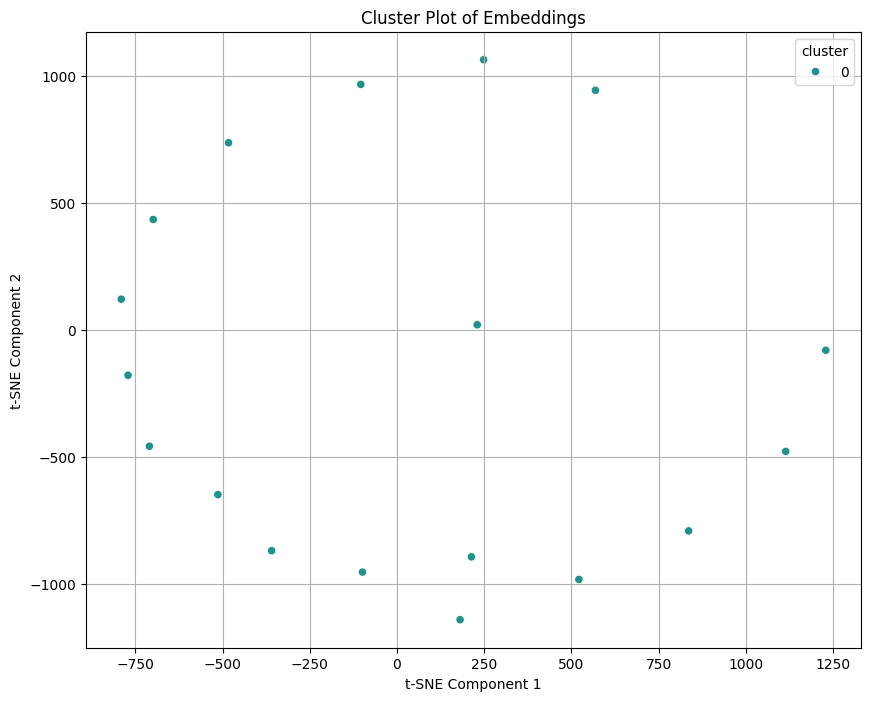

In [44]:
from sklearn.cluster import KMeans
import seaborn as sns

kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)

merged_df['cluster'] = cluster_labels

plt.figure(figsize=(10, 8))
sns.scatterplot(x='tsne_x', y='tsne_y', hue='cluster', data=merged_df, palette='viridis', legend='full')
plt.title('Cluster Plot of Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()


In [47]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(embeddings)

plt.figure(figsize=(50, 100))
sns.heatmap(similarity_matrix, cmap='coolwarm', xticklabels=ids, yticklabels=ids)
plt.title('Similarity Heatmap of Embeddings')
plt.xlabel('IDs')
plt.ylabel('IDs')
plt.show()


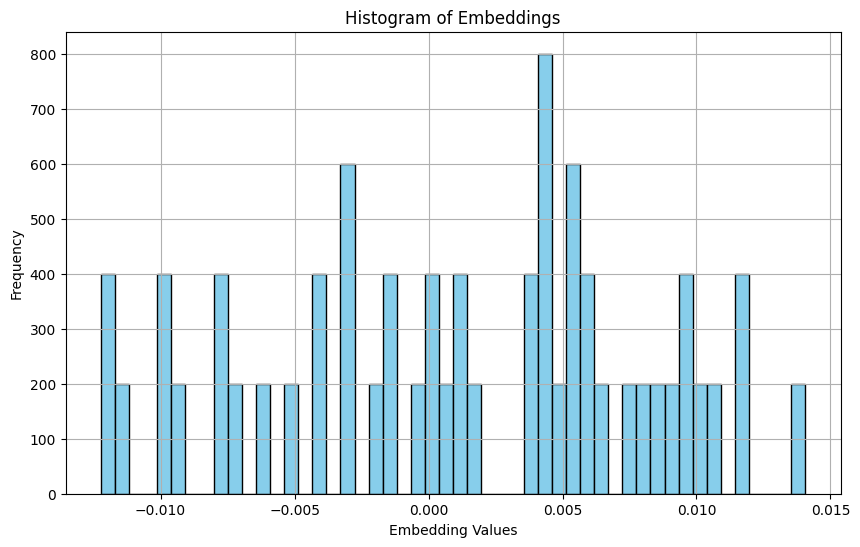

In [48]:

plt.figure(figsize=(10, 6))
plt.hist(embeddings.flatten(), bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Embeddings')
plt.xlabel('Embedding Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
